In [26]:
#import important libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LassoCV
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, normalize
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from prettytable import PrettyTable
import math
from sklearn import metrics


In [27]:
#read dataset csv file.
df = pd.read_csv('Social_Network_Ads.csv')

In [28]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.7+ KB


In [30]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [31]:
df.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [32]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [33]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

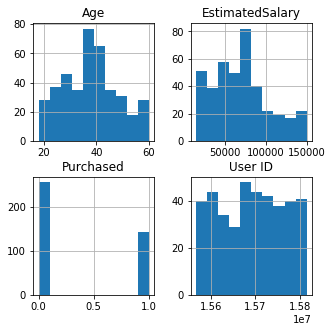

In [34]:
df.hist(figsize=(5,5))
plt.show()

In [35]:
X = df.drop('Purchased', 1)
Y = df.Purchased

In [36]:
# find categorical variables
categorical = [var for var in X.columns if df[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))

There are 1 categorical variables


In [37]:
# find numerical variables
numerical = [var for var in X.columns if df[var].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))

There are 3 numerical variables


In [38]:
df=pd.get_dummies(df,drop_first=True)

In [39]:
X = df.drop('Purchased', 1)
Y = df.Purchased

In [40]:
X = normalize(X)

In [41]:
pd.DataFrame(X).head()

,0,1,2,3
0,0.999999,0.000001,0.001216,6.400196e-08
1,0.999999,0.000002,0.001265,6.324728e-08
2,0.999996,0.000002,0.002744,0.000000e+00
3,0.999993,0.000002,0.003653,0.000000e+00
4,0.999988,0.000001,0.004809,6.327438e-08


In [42]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [43]:
#Using sklearn linear regression model

x_data_train, x_data_test, y_data_train, y_data_test = train_test_split(
        X, Y, test_size=0.25,random_state=42)
    
algorithms = {'DecisionTreeClassifier(random_state=0)':'DecisionTreeClassifier', 
              'KNeighborsClassifier(n_neighbors=3)': 'KNN',
              "LogisticRegression()" : "LogisticRegression",
           'RandomForestRegressor(max_depth=2, random_state=0,n_estimators=100)' :'RandomForesRegression',
              'svm.SVC()' : 'SVM'
             }
acc_train_test = []
r2_train_test = []
results =  {}
for key, value in algorithms.items():        
        model = eval(key)
        reg = model.fit(x_data_train,y_data_train)            
        y_pred_train =  reg.predict(x_data_train)
        y_pred_test =  reg.predict(x_data_test)

        r2_train_test.append([value, (r2_score(y_data_train,y_pred_train),r2_score(y_data_test,y_pred_test)), 
                          (reg.score(x_data_train,y_data_train), reg.score(x_data_test,y_data_test))])
results.update({"data": r2_train_test})        
x = PrettyTable()
x.field_names = ["Algorithm", "R2Score (Train/Test)", "Accuracy (Train/Test)"]
r2score = results['data']
for val in range(0 , len(r2score)):
    r2_value = str(math.floor(r2score[val][2][0]*100)) + '/' + str(math.floor(r2score[val][2][1]*100))
    acc_value = str(math.floor(r2score[val][1][0]*100)) + '/' + str(math.floor(r2score[val][1][1]*100))
    x.add_row([r2score[val][0], r2_value, acc_value])
print(x)

+------------------------+----------------------+-----------------------+
|       Algorithm        | R2Score (Train/Test) | Accuracy (Train/Test) |
+------------------------+----------------------+-----------------------+
| DecisionTreeClassifier |        100/90        |         100/57        |
|          KNN           |        85/74         |         34/-12        |
|   LogisticRegression   |        64/63         |        -55/-59        |
| RandomForesRegression  |        68/74         |         68/74         |
|          SVM           |        64/63         |        -55/-59        |
+------------------------+----------------------+-----------------------+
